<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [12]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [13]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [14]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
boston_df.drop('Unnamed: 0',axis=1,inplace=True)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [16]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [17]:
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

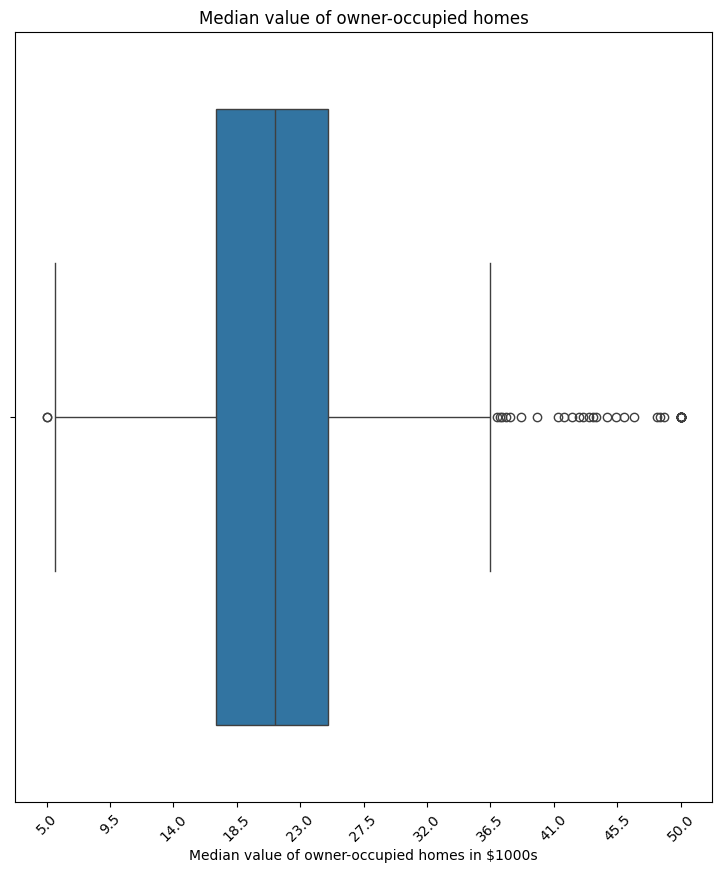

In [18]:
import numpy as np
fig , ax= plt.subplots(figsize=(9,10))
ax=sns.boxplot(data=boston_df,x='MEDV')
ax.set_title('Median value of owner-occupied homes')
ax.set_xlabel('Median value of owner-occupied homes in $1000s')
min_medv = boston_df['MEDV'].min()
max_medv = boston_df['MEDV'].max()
step = (max_medv - min_medv) / 10  

ticks = np.arange(min_medv, max_medv + step, step)
ax.set_xticks(ticks)
ax.set_xticklabels([f'{tick:.1f}' for tick in ticks], rotation=45)
plt.show()

In [19]:
print(' Minmum is' , np.percentile(boston_df['MEDV'],0))
print(' the first percentile is' , np.percentile(boston_df['MEDV'],25))
print(' madian is' , np.percentile(boston_df['MEDV'],50))
print(' the thrid  percentile is' , np.percentile(boston_df['MEDV'],75))
print(' maximum is' , np.percentile(boston_df['MEDV'],100))

 Minmum is 5.0
 the first percentile is 17.025
 madian is 21.2
 the thrid  percentile is 25.0
 maximum is 50.0


In [20]:
# it's clearly that there is one outlier that is 5 which is  so small and any value that is above 36.5 is an ouliter too the madian is close to 21 and the data range is between 5 and 50 

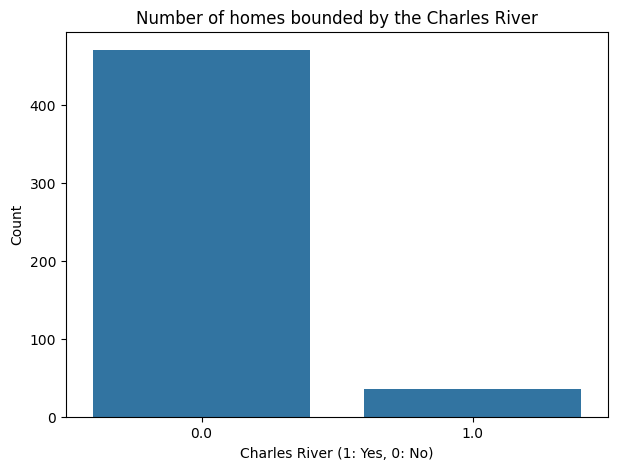

In [26]:
# Second Question is Provide a  bar plot for the Charles river variable

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Create a bar plot for the Charles River variable
sns.countplot(data=boston_df, x='CHAS', ax=ax)

# Set the title and labels
ax.set_title('Number of homes bounded by the Charles River')
ax.set_xlabel('Charles River (1: Yes, 0: No)')
ax.set_ylabel('Count')

# Show the plot
plt.show()

In [22]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



In [23]:
bins = [0, 35, 70, 100000]  # Define the age intervals
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

# Create the 'Age_group' column
boston_df['Age_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

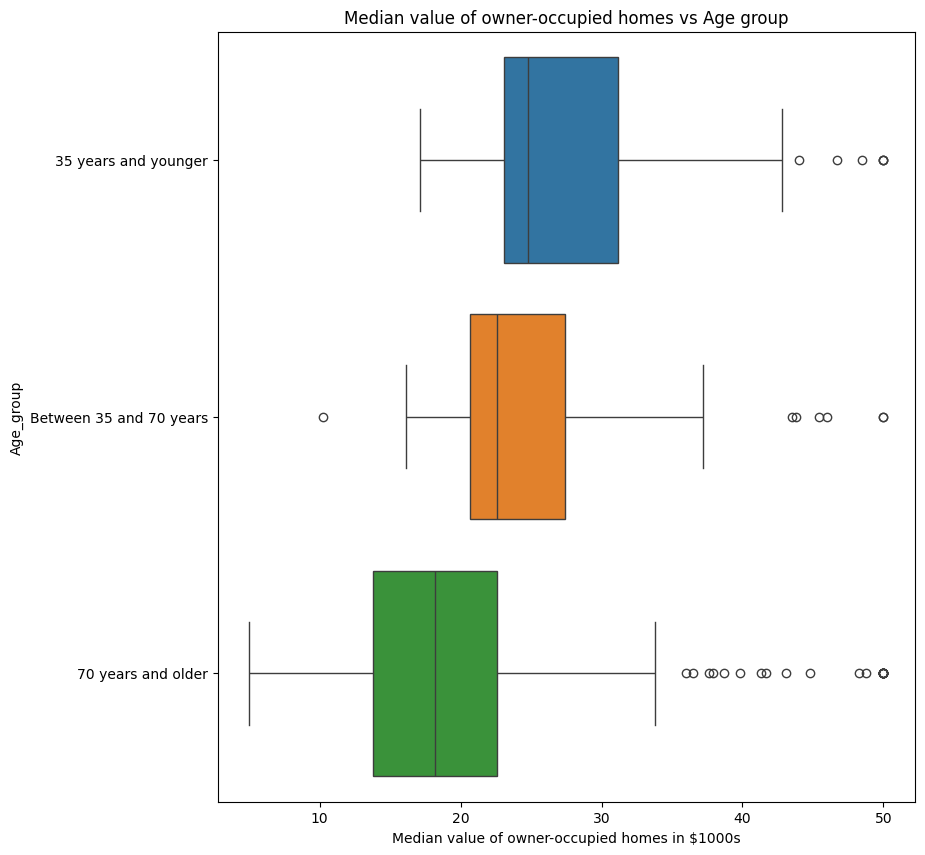

In [24]:

fig , ax= plt.subplots(figsize=(9,10))
ax=sns.boxplot(data=boston_df,x='MEDV',y='Age_group',hue='Age_group')
ax.set_title('Median value of owner-occupied homes vs Age group')
ax.set_xlabel('Median value of owner-occupied homes in $1000s')
 

plt.show()


In [2]:
"the madin of owner occupied age gets lower whenever the aga goes up "

'the madin of owner occupied age gets lower whenever the aga goes up '

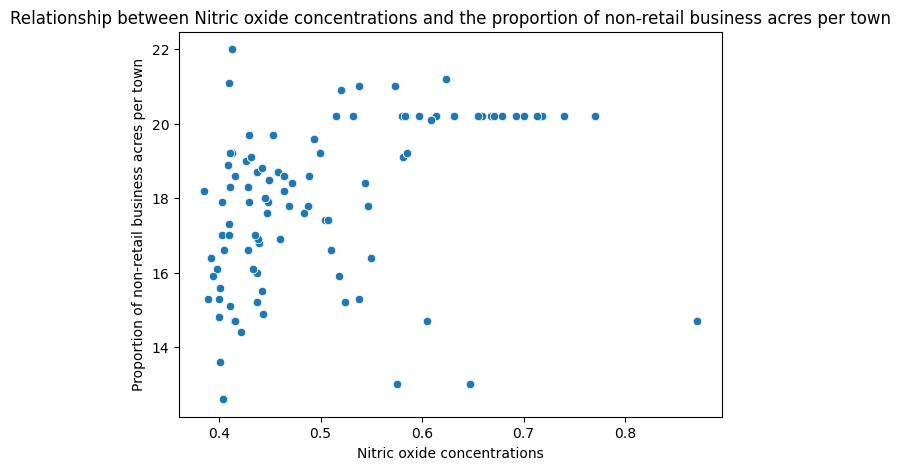

In [139]:
#Thrid question Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
fig , ax= plt.subplots(figsize=(7,5))
ax=sns.scatterplot(data=boston_df,x='NOX',y='PTRATIO')
ax.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
ax.set_xlabel('Nitric oxide concentrations')
ax.set_ylabel('Proportion of non-retail business acres per town')

plt.show()

In [140]:
"There is no strong evidance to show the relationship between nitric oxide concentrations and the proportion of non-business acres per town however there is a small relation that the more nitric oxide concentations there is more propotion of non retails business "


'There is no strong evidance to show the relationship between nitric oxide concentrations and the proportion of non-business acres per town however there is a small relation that the more nitric oxide concentations there is more propotion of non retails business '

In [141]:
#Fourth question Create a histogram for the pupil to teacher ratio varia

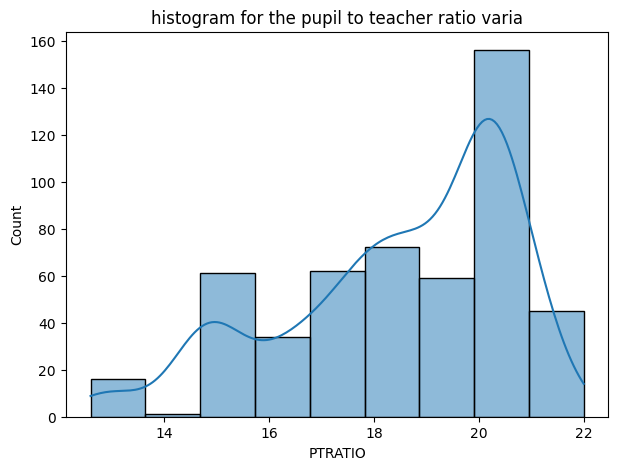

In [142]:
fig , ax= plt.subplots(figsize=(7,5))
ax=sns.histplot(data=boston_df,x='PTRATIO', binwidth=1,kde=True)
ax.set_title('histogram for the pupil to teacher ratio varia')


plt.show()

In [143]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

x=boston_df[['MEDV']][boston_df['CHAS']==1]
y=boston_df[['MEDV']][boston_df['CHAS']==0]
print(boston_df.shape[0])
print(y.shape[0]+x.shape[0])


506
506


In [178]:
t_stat, p_value=scipy.stats.ttest_ind(x,y)
Null_Hypothesis="There is no significant difference in the median value of houses bounded by the Charles River."
Alternative_Hypothesis= " There is a significant difference in the median value of houses bounded by the Charles River"


In [179]:

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print(Alternative_Hypothesis)
else:
    print(Null_Hypothesis)

T-statistic: [5.50373205]
P-value: [6.53950009e-08]
 There is a significant difference in the median value of houses bounded by the Charles River


In [180]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


In [181]:
group=boston_df['Age_group'].unique()
x=boston_df[['MEDV']][boston_df['Age_group']==group[0]]
y=boston_df[['MEDV']][boston_df['Age_group']==group[1]]
z=boston_df[['MEDV']][boston_df['Age_group']==group[2]]

print(group)
print(boston_df.shape[0])
print(y.shape[0]+x.shape[0]+z.shape[0])

['Between 35 and 70 years', '70 years and older', '35 years and younger']
Categories (3, object): ['35 years and younger' < 'Between 35 and 70 years' < '70 years and older']
506
506


In [183]:
Null_Hypothesis=" There is no significant difference in  in MEDV (median house values) across the different categories or levels of AGE."
Alternative_Hypothesis= " there  is a significant difference in MEDV (median house values) across the different categories or levels of AGE"


In [184]:
statis , p_value = scipy.stats.f_oneway(x,y,z)
if p_value < 0.05:
    print(Alternative_Hypothesis)
else:
    print(Null_Hypothesis)
 

 there  is a significant difference in MEDV (median house values) across the different categories or levels of AGE


In [185]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



# Fit the ANOVA model
model = ols('MEDV ~ C(Age_group)', data=boston_df).fit()

# Perform ANOVA
anova_table = anova_lm(model)

# Print the ANOVA table
print(anova_table)

                 df        sum_sq      mean_sq         F        PR(>F)
C(Age_group)    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual      503.0  37314.563532    74.184023       NaN           NaN


In [186]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [187]:
nitric_oxide=boston_df['NOX']
non_retail_acres=boston_df['INDUS']
Null_Hypothesis= "There is no linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town"
Alternative_Hypothesis=" There is a linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town."

In [188]:
correlation, p_value = scipy.stats.pearsonr(nitric_oxide, non_retail_acres)

# Print the results
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpretation based on the results
if p_value < 0.05:
    print(Alternative_Hypothesis)
else:
    print(Null_Hypothesis)

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
 There is a linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


In [193]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [199]:
five_Boston_centres=boston_df['DIS']
median_value_homes=boston_df['MEDV']
Null_Hypothesis= "There is no significant relationship between weighted distance and median home value"
Alternative_Hypothesis=" There is a significant relationship between weighted distance and median home value."


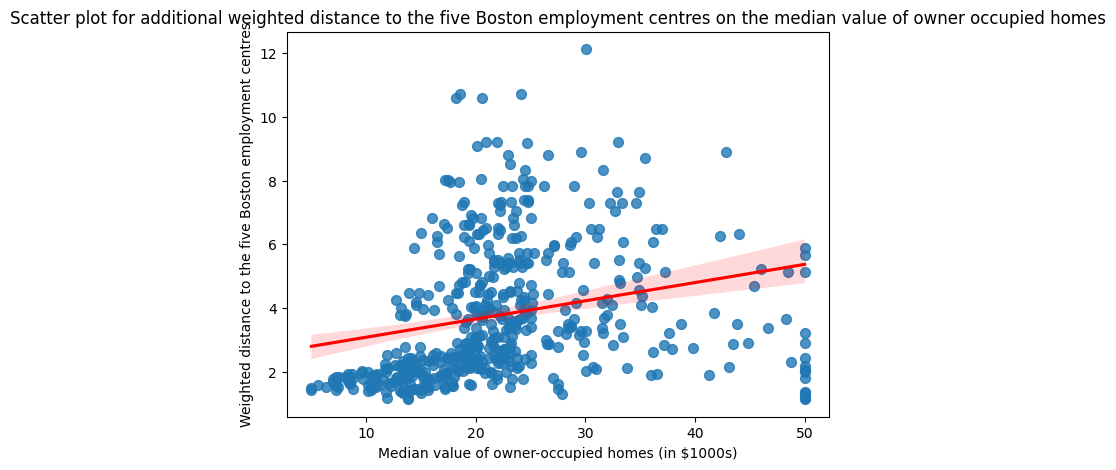

In [200]:
fig, ax = plt.subplots(figsize=(7, 5))

# Create a scatter plot with a regression line
sns.regplot(data=boston_df, x='MEDV', y='DIS', ax=ax, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set the title and labels
ax.set_title('Scatter plot for additional weighted distance to the five Boston employment centres on the median value of owner occupied homes')
ax.set_xlabel('Median value of owner-occupied homes (in $1000s)')
ax.set_ylabel('Weighted distance to the five Boston employment centres')

# Show the plot
plt.show()

In [202]:
slope,intercept,rvalue,pvalue,stderr=scipy.stats.linregress(five_Boston_centres,median_value_homes)

In [204]:
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard error: {stderr}")

# Interpretation
if p_value < 0.05:
    print(Alternative_Hypothesis)
else:
    print(Null_Hypothesis)

Slope: 1.0916130158411097
Intercept: 18.390088330493384
R-squared: 0.06246437212178246
P-value: 1.2066117273371223e-08
Standard error: 0.18837841478683107
 There is a significant relationship between weighted distance and median home value.
